# Tutorial: Gravitational Waves

## Waveform theory in short
Large portions of this section are based on [[1]](#gravitational_waves_v1) and chapter 2 of [[2]](#schaefer_master).

Gravitational waves are a prediction by Einstein's theory of general relativity. To find their existence one linearizes the Einstein equations

$$
R_{\mu\nu} - \frac{1}{2}R g_{\mu\nu} = \frac{16\pi G}{c^4} T_{\mu\nu}.
$$

To do so we assume that the spacetime is basically flat, i.e. Newtonian, with small pertubations. Mathematically this assumption can be expressed by

$$
g_{\mu\nu} = \eta_{\mu\nu} + h_{\mu\nu},
$$

where $\eta_{\mu\nu}$ is the flat, Minkowski metric and $h_{\mu\nu}$ are small deviations. Inserting this approximation into the Einstein equations and discarding all terms of order $\mathcal{O}\left(h^2\right)$ and above, together with the constraint of being in a vacuum, i.e. $T_{\mu\nu}=0$, yields

$$
\Box \bar{h}_{\mu\nu}=0,\ \bar{h}_{\mu\nu} = h_{\mu\nu}-\frac{1}{2}\eta_{\mu\nu}h.
$$

This is the familiar wave-equation that is known for instance from electro-magnetism. Therefore, we know that there are wave-like solutions to the Einstein equation. However, it only tells us gravitational waves can propagate through vacuum, but not how they look like.

To solve that question we need to consider the sources that produce these wave. This requires to drop the constraint $T_{\mu\nu}=0$. After a lot of mathematical tricks and using a specific frame of reference one arrives at the Quadrupole formula

$$
h_{ab}\left(t, \vec{x}\right) = \frac{2G}{c^4}\frac{1}{r}\frac{d^2}{dt^2}Q_{ab}\left(t-r/c\right).
$$

Here $Q_{ab}=I_{ab}-1/3\delta_{ab}I^c_c$ is the trace-corrected second mass moment and $I_{ab}$ is the original second mass moment, also known as the inertia tensor. Note that the indices are latin letters and are only meant to be evaluated on the 3 spatial dimensions.

This equation in principle allows us to calculate the waveform from a system whos dynamics are not influenced by the gravitational field or its radiation. However, we would like to calculate the motion of a binary system from which energy is carried away by gravitational waves. The energy radiatiated from a system by gravitational waves at any given time is known as the luminosity. Deriving it involves second order corrections in $h$ of the curvature tensor $R_{\mu\nu}$ and defining an effective energy-momentum tensor from these results. Doing so would go beyond the scope of this tutorial but you can check chapter 1 of [[1]](#gravitational_waves_v1) for more information. The result is

$$
L_{\text{GW}} = \frac{G}{5c^5}\langle\left(\frac{d^3}{dt^3}Q^{ab}\right)\left(\frac{d^3}{dt^3}Q_{ab}\right)\rangle,
$$

where $\langle\cdot\rangle$ is an average in time.

To derive an approximated form of the waveform goverened by the energy loss due to gravitational radiation one equates the luminosity with the negative time derivative of the orbital Newtonian energy

$$
L_{\text{GW}} \overset{!}{=} -\frac{d}{dt}E_\text{orbit} = -\frac{1}{2}\frac{G m_1 m_2 \frac{d}{dt}R}{R^2}.
$$

where $R$ is the orbital separation. For the next step a quasi-circular orbit of two point-masses is assumed. This in turn allows us to calculate $Q_{ab}$ and in turn $L_\text{GW}$. From this one obtains the two polarizations of the waveform

$$
\Phi\left(\tau\right) = -2 \left(\frac{5 G M_c}{c^3}\right)^{-5/8}\tau^{5/8}+\Phi_0\\
h_+\left(\tau\right) = \frac{1}{r}{\left(\frac{G M_c}{c^2}\right)}^{5/4}{\left(\frac{5}{c\tau}\right)}^{1/4}\left(\frac{1+\cos^2\left(\iota\right)}{2}\right)\cos\left(\Phi\left(\tau\right)\right)\\
h_\times\left(\tau\right) = \frac{1}{r}{\left(\frac{G M_c}{c^2}\right)}^{5/4}{\left(\frac{5}{c\tau}\right)}^{1/4}\cos\left(\iota\right)\sin\left(\Phi\left(\tau\right)\right)
$$

These waveforms have a lot of parameters. They are as follows:
 - $M_c = \frac{{\left(m_1 m_2\right)}^{3/5}}{{\left(m_1 + m_2\right)}^{1/5}}$ is known as the chirp-mass. It is the only way the component masses $m_1$ and $m_2$ influence the waveform.
 - $\tau$ is the time after merger. This means that the merger takes place at $\tau = 0$ and times prior to the merger are negative.
 - $\Phi_0$ is the phase of the binary system at merger, also known as coalescence time.
 - $r$ is the distance between the observer and the binary system.
 - $\iota$ is the inclination, i.e. the angle between the normal of the orbital plane and the line of sight of the observer.
 - $c$ is the speed of light in vacuum.
 - $G$ is the gravitational constant.

Below you can find a plot of the waveforms and you can play around with the different parameters.

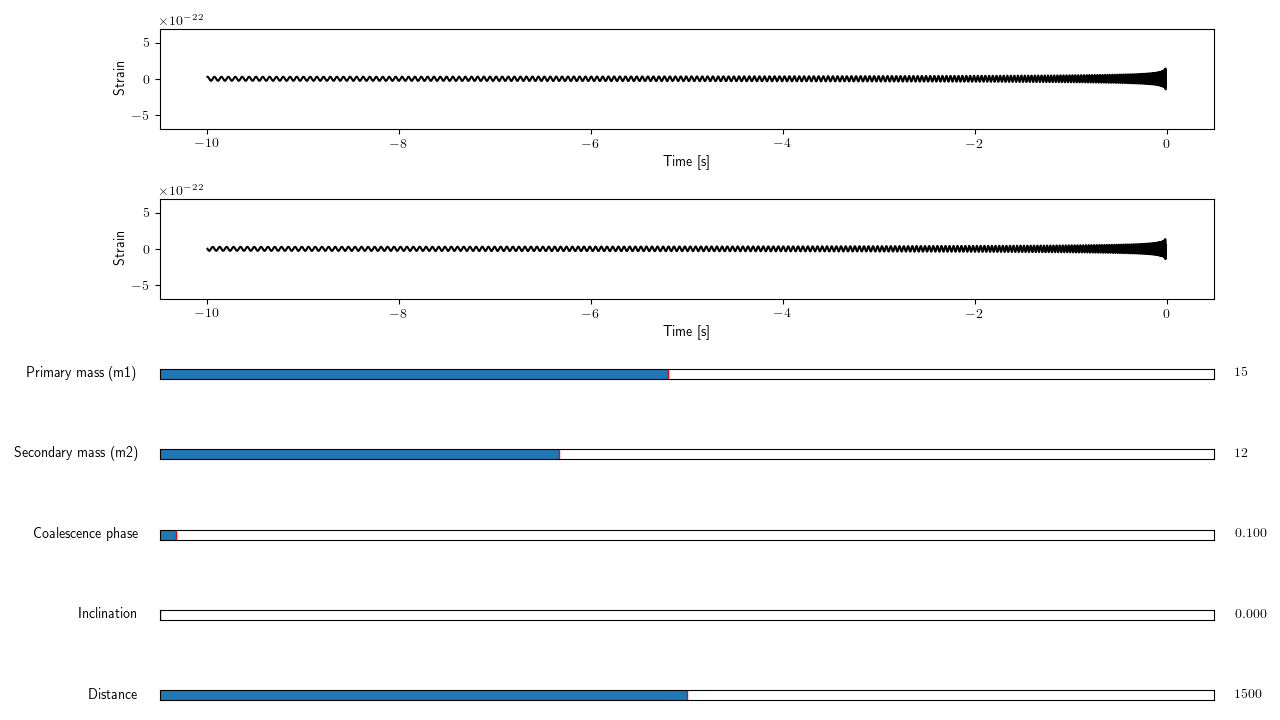

In [1]:
%matplotlib widget
#%matplotlib tk
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex': True})
from matplotlib.widgets import Slider
import numpy as np

#Define constants
c = 299792458
G = 6.67408 * 1e-11
msol = 1.98847 * 1e30
pc = 3.0857 * 1e16
t = np.linspace(-10, -0.01, 10000)

#Define physics functions
def mchirp(m1, m2):
    return (m1 * m2) ** (3. / 5.) / (m1 + m2) ** (1. / 5.)

def get_wave(m1, m2, coa_phase, iota, r):
    m1 *= msol
    m2 *= msol
    r *= 1e6 * pc
    phi = -2 * (5 * G * mchirp(m1, m2) / c ** 3) ** (-5. / 8.) * np.sign(t) * np.abs(t) ** (5. / 8.) + coa_phase
    hp = (G * mchirp(m1, m2) / c ** 2) ** (5. / 4.) * np.sign(t) * (5 / (c * np.abs(t))) ** (1. / 4.) * ((1 + np.cos(iota) ** 2) / 2) * np.cos(phi) / r
    hc = (G * mchirp(m1, m2) / c ** 2) ** (5. / 4.) * np.sign(t) * (5 / (c * np.abs(t))) ** (1. / 4.) * np.cos(iota) * np.sin(phi) / r
    return hp, hc

#Set initial parameters
init_m1 = 15
m1_lim = (1, 30)
init_m2 = 12
m2_lim = (1, 30)
init_coa_phase = 0.1
coa_phase_lim = (0., 2 * np.pi)
init_iota = 0.
iota_lim = (0., 2 * np.pi)
init_r = 1500
r_lim = (1000, 2000)

#Set up plot
fig, axs = plt.subplots(nrows=7, gridspec_kw={'height_ratios': [2] * 2 + [0.2] * 5}, figsize=(12.8, 7.2), num='Linearized Gravity Waveform Polarizations')
hp, hc = get_wave(init_m1, init_m2, init_coa_phase, init_iota, init_r)
hpline, = axs[0].plot(t, hp, color='black')
hcline, = axs[1].plot(t, hc, color='black')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Strain')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Strain')

hpex, hcex = get_wave(m1_lim[1], m2_lim[1], coa_phase_lim[1], iota_lim[0], r_lim[0]) #Calculate wave at extremal values
ylim = 1.1 * max(np.abs(hpex).max(), np.abs(hcex).max())
axs[0].set_ylim(-ylim, ylim)
axs[1].set_ylim(-ylim, ylim)

m1_slider = Slider(ax=axs[2],
                   label='Primary mass (m1)',
                   valmin=m1_lim[0],
                   valmax=m1_lim[1],
                   valinit=init_m1)
m2_slider = Slider(ax=axs[3],
                   label='Secondary mass (m2)',
                   valmin=m2_lim[0],
                   valmax=m2_lim[1],
                   valinit=init_m2)
coa_phase_slider = Slider(ax=axs[4],
                          label='Coalescence phase',
                          valmin=coa_phase_lim[0],
                          valmax=coa_phase_lim[1],
                          valinit=init_coa_phase)
iota_slider = Slider(ax=axs[5],
                     label='Inclination',
                     valmin=iota_lim[0],
                     valmax=iota_lim[1],
                     valinit=init_iota)
r_slider = Slider(ax=axs[6],
                  label='Distance',
                  valmin=r_lim[0],
                  valmax=r_lim[1],
                  valinit=init_r)

def update(val):
    hp, hc = get_wave(m1_slider.val,
                      m2_slider.val,
                      coa_phase_slider.val,
                      iota_slider.val,
                      r_slider.val)
    hpline.set_ydata(hp)
    hcline.set_ydata(hc)

m1_slider.on_changed(update)
m2_slider.on_changed(update)
coa_phase_slider.on_changed(update)
iota_slider.on_changed(update)
r_slider.on_changed(update)
fig.tight_layout()
None

These waveforms are calculated in the reference-frame of the source. They need to be projected onto a detector in order to simulate a measurable output. The calculations for a Michelson-interferometer with an angle of 90° between the arms (the kind of instrument used by LIGO, Virgo, and Kagra) are somewhat lengthy and make use of Euler-angles. But at the end one arrives at the detector readout

$$
\delta l = F_+\left(\theta, \varphi\right)\left(\cos\left(2\psi\right)h_+-\sin\left(2\psi\right)h_\times\right)+F_\times\left(\theta, \varphi\right)\left(\sin\left(2\psi\right)h_++\cos\left(2\psi\right)h_\times\right),
$$
with
$$
F_+\left(\theta, \varphi\right) = \frac{1}{2}\left(1+\cos^2\left(\theta\right)\right)\cos\left(2\varphi\right),\\
F_\times\left(\theta, \varphi\right) = \cos\left(\theta\right)\sin\left(2\varphi\right).
$$

Here $\varphi$ is the right ascension and $\theta$ the declination with the detector as a reference plane. The angle $\psi$ is the polarization angle and it is the angle by which the plane of orbital motion has to be rotated around the line of sight of the observer.

Below you can find a plot of the projected waveforms and can play around with the sky-position (i.e. $\theta$ and $\varphi$) as well as the polarization angle.

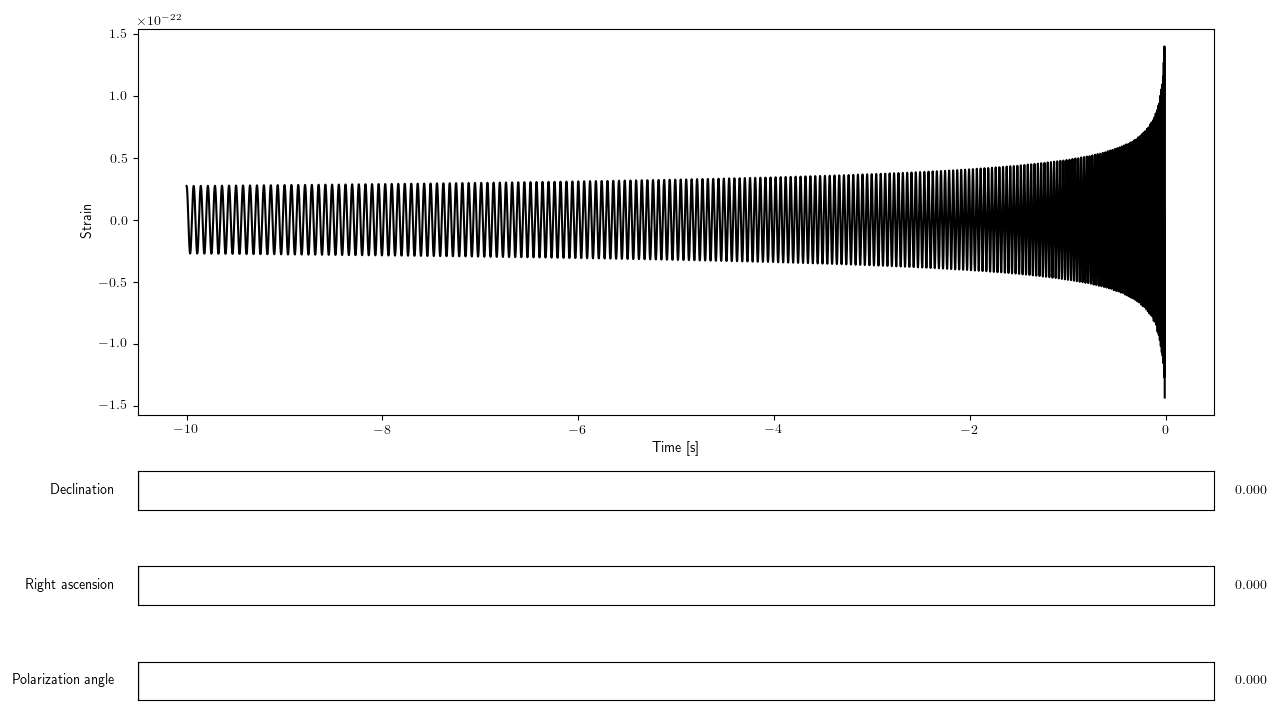

In [2]:
#Initial parameters
init_theta = 0
theta_min, theta_max = (0, np.pi)
init_phi = 0
phi_min, phi_max = (0, 2 * np.pi)
init_psi = 0
psi_min, psi_max = (0, 2 * np.pi)

#Function definitions
def fplus(theta, phi):
    return (1 + np.cos(theta) ** 2) * np.cos(2 * phi) / 2

def fcross(theta, phi):
    return np.cos(theta) * np.sin(2 * phi)

def project_wave(hp, hc, theta, phi, psi):
    fp = fplus(theta, phi)
    fc = fcross(theta, phi)
    return fp * (np.cos(2 * psi) * hp - np.sin(2 * psi) * hc) + fc * (np.sin(2 * psi) * hp + np.cos(2 * psi) * hc)

#Plotting
hp, hc = get_wave(init_m1, init_m2, init_coa_phase, init_iota, init_r)
wav = project_wave(hp, hc, init_theta, init_phi, init_psi)

fig, axs = plt.subplots(nrows=4, gridspec_kw={'height_ratios': [2] * 1 + [0.2] * 3}, figsize=(12.8, 7.2), num='Linearized Gravity Projected Wave')
line, = axs[0].plot(t, wav, color='black')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Strain')

theta_slider = Slider(ax=axs[1],
                      label='Declination',
                      valmin=theta_min,
                      valmax=theta_max,
                      valinit=init_theta)
phi_slider = Slider(ax=axs[2],
                    label='Right ascension',
                    valmin=phi_min,
                    valmax=phi_max,
                    valinit=init_phi)
psi_slider = Slider(ax=axs[3],
                    label='Polarization angle',
                    valmin=psi_min,
                    valmax=psi_max,
                    valinit=init_psi)

def update(val):
    wav = project_wave(hp,
                       hc,
                       theta_slider.val,
                       phi_slider.val,
                       psi_slider.val)
    line.set_ydata(wav)

theta_slider.on_changed(update)
phi_slider.on_changed(update)
psi_slider.on_changed(update)
fig.tight_layout()

This waveform is a nice approximation but it has several problems. Most importantly the approximation assumes that the orbital dynamics are given by Newtonian mechanics. Therefore, no general relativistic effects other than the gravitational radiation are considered. Mathematically this is expressed in the approximation $g_{\mu\nu}\approx\eta_{\mu\nu}+h_{\mu\nu}$, with $h$ small. This means that the geometry of the spacetime is basically given by the flat, special relativitic metric $\eta_{\mu\nu}$. However, as the two bodies orbit each other they loose orbital energy. In turn the bodies have to come closer together, thus spiraling towards each other. At some point the two objects will be too close for the assumption of an almost flat geometry to hold true. Thus the approximation breaks down the closer we get to the merger of the two objects.

Secondly, we have not considered any effects caused by the spins of the two objects. Considering them leads to effects like precession.

Finally, the waveform depends on the component masses only through the combination known as the chirp-mass $M_c$. This means that if the waveforms would be accurate, we would have no means of determining the individual masses of the two bodies.

For these reasons one can use a different approximation, where the full metric $g_{\mu\nu}$ is expanded in powers of $v/c$, where $v$ is the velocity of the orbiting objects. This approximation is known as the post-Newtonian formalism. We will not go into details here (check chapter 5 of [[1]](#gravitational_waves_v1) for more information), but simply mention that to first order we get back the familiar linearized equations. For higher orders we can determine spin-effects and also have a dependence on the mass-ratio $q$, which allows us to disentangle the degeneracy of the masses. However, since this is a higher-order effect, its influence on the waveform is much smaller. Therefore, when parameters of astrophysical signals are given, the chirp-mass is usually one of the best constrained parameters, whereas the error on the mass-ratio and in extension the errors for the individual component masses are much larger.

Still, even the post-Newtonian waveforms are not valid at or very close to the merger. The most accurate waveform models we have come from numerical relativity. These numerically solve the full Einstein equations, i.e. determine the components of the metric from the mass-distribution specified by the energy-momentum tensor. However, since they are highly non-linear these calculations can take weeks on the largest super computers. This makes them infeasible for many purposes, such as fast data simulation and most current data analysis methods (see below).

For this reason the community has developed a plethora of waveform-approximants. The main approximation methods are Phenom-models (join analytical models of the inspiral with analytical models of the ringdown by tuning parameters to numerical relativity), EOB-models (tune parameters of a Hamiltonian to numerical relativity), and NR-surrogate models (interpolation of numerical relativity waveforms). In the MLGWSC-1 we use a waveform-approximant known as `IMRPhenomXPHM` [[3]](#imrphenomxphm). This seems like a very chaotic name, but it has a lot of structure that tells you the main features of the waveform. `IMR` stands for inspiral-merger-ringdown, i.e. the wavefrom models all stages of the coalescence of a binary system. `Phenom` specifies the kind of waveform approximation-method used. `X` is a newer version of the `Phenom` models. The letter `P` signifies that the model is able to deal with non-aligned spins and calculate precession effects. Finally, the letters `HM` signify that the waveform model is also able to calculate higher harmonics. The waveform can be decomposed into spherical harmonics. Usually only the fundamental $22$-mode is considered, as it is strongly dominant. However, for systems where the mass-ratio is very unequal higher harmonics can lead to non-negligable contributions [[4]](#GW190814) to the detectable signal. `IMRPhenomXPHM` is one of the most accurate waveform models that are currently available, which is why we chose it for our challenge.

## Effects of parameters on the signal
To qualitatively understand the morpholgy of signals from different binary systems, we will summarize the effect the change of different parameters has on the waveform. For this we will consider the total mass $M=m_1 + m_2$ and the chirp-mass $M_c=\frac{{\left(m_1 m_2\right)}^{3/5}}{{\left(m_1 + m_2\right)}^{1/5}}$ instead of the individual component masses $m_1$ and $m_2$.

|                      | Parameter name      | Common symbol                                       | Effect on waveform                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
|----------------------|---------------------|-----------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Intrinsic parameters | Chirp mass          | $M_c$                                               | To first order the chirp mass is the parameter that influences the frequency evolution of the signal. This can be seen by considering the phase of the gravitational wave $\Phi\left(\tau\right)$. The only parameter other than constants that directly interfaces with the time dependence is the chirp-mass. It also scales the amplitude of the signals. However, this effect is not as important, as it is not degenerate with the distance or inclination, due to the effect on the frequency evolution.                          |
|                      | Total mass          | $M$                                                 | The primary effect of the total mass is its influence on the cutoff-frequency, i.e. the gravitational-wave frequency at which the two bodies merge. The larger the total mass, the lower the maximum frequency. This can be understood from the fact that heavier (compact) objects are larger than lighter ones. Therefore, their minimum orbital separation is larger which in turn results in a slower orbit. As a secondary effect, the total mass also scales the amplitude of the signal. The larger the total mass, the higher the amplitude. |
|                      | Mass ratio          | $q$                                                 | The mass ratio is important for effects such as higher order multipoles and precession. A larger mass ratio (i.e. a less equal mass distribution between the constituents of the system) results in a larger effect of the higher order modes and precession.                                                                                                                                                                                                                                                                        |
|                      | Spins               | $\vec{\chi}_1, \vec{\chi}_2$ | The spins can have varying effects and they depend mostly on their magnitude and their alignment with the orbital angular momentum. When they are aligned with the orbital angular momentum they mostly have an effect on the time-scale of the inspiraling system. The more aligned they are the longer the system takes to coalesce. In cases where they are not aligned with the orbital angular momentum they introduce precession effects on the system.                                                                                                                                                                  |
| Extrinsic parameters | Coalescence phase   | $\Phi_0$                                            | The coalescence phase specifies the phase of the signal at merger. Therefore, it shifts the phase of the signal by a constant amount.                                                                                                                                                                                                                                                                                                                                                                                                                |
|                      | Coalescence time    | $t_0$                                               | The time that specifies the merger. Altering this parameter shifts the waveform in the time domain by a constant amount.                                                                                                                                                                                                                                                                                                                                                                                                                             |
|                      | Inclination         | $\iota$                                             | The inclination specifies the angle between the angle between the orbital angular momentum and the line of sight of the observer. Without higher multipoles it is degenerate with the distance, as both influence only the amplitude of the signal. If higher multipoles can be observed, this degeneracy is broken. The same is true for precession effects.                                                                                                                                                                                                                                |
|                      | Luminosity distance | $r$                                         | The distance between the observer and the radiating system. It scales the amplitude of the signal by a factor $1/r$. Without higher harmonics or precession it is degenerate with the effects of the inclination.                                                                                                                                                                                                                                                                                                                                                  |
|                      | Right ascension     | $\alpha$                               | The right ascension of the system. In the challenge this right ascension is given with respect to the standard geocentric coordinates. For a single detector it is degenerate with the distance. With multiple detectors the sky position can be constrained by the difference in the arrival times of the signal in the different detectors.                                                                                                                                                                                                    |
|                      | Declination         | $\delta$                                | The declination of the system. In the challenge this declination is given with respect to the standard geocentric coordinates. For a single detector it is degenerate with the distance. With multiple detectors the sky position can be constrained by the difference in the arrival times of the signal in the different detectors.                                                                                                                                                                                                            |
|                      | Polarization angle  | $\psi$                                              | The polarization angle specifies the angle by which the plane of the orbital motion has to be rotated around the line of sight of the observer. It has a relation with the polarization of the wave.                                                                                                                                                                                                                                                                                                                                                                                                                         |

Below you can play around with the individual waveform parameters. Not all combinations of $M_c$ and $M$ are allowed. If an impossible combination is chose, the graph will simply display zeros. Generally, the slider for the chirp mass must be to the left or on equal "height" as the total mass slider.

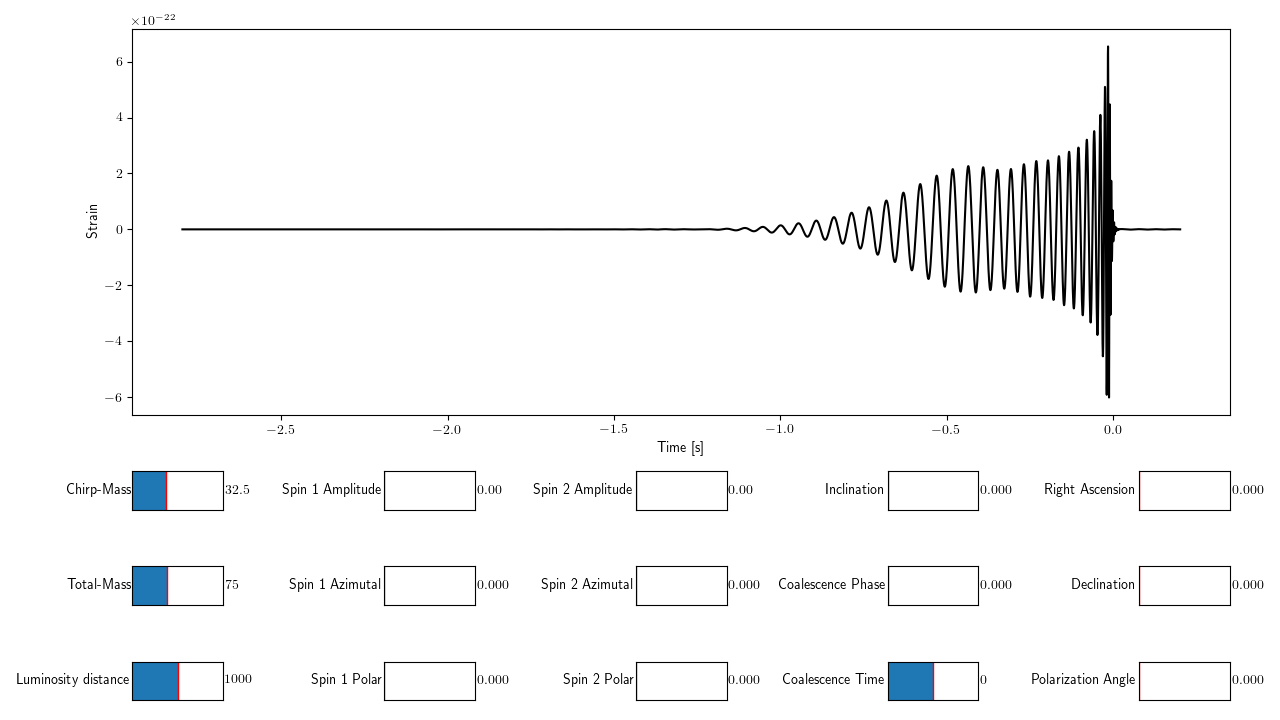

In [3]:
from matplotlib.gridspec import GridSpec
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform
from pycbc.coordinates import spherical_to_cartesian

#Constants
det = Detector('H1')

#Function definitions
def mass1_mass2_from_mchirp_mtotal(mchirp, mtotal): 
    m1 = mtotal / 2 + ((mtotal / 2) ** 2 - (mchirp * mtotal ** (1. / 5.)) ** (5. / 3.)) ** (1. / 2.)
    m2 = mtotal - m1
    return m1, m2

def get_wav(m1, m2, spin1x, spin1y, spin1z, spin2x, spin2y, spin2z, inclination, distance, coa_phase, tc, ra, dec, pol):
    hp, hc = get_td_waveform(approximant='IMRPhenomXPHM',
                             f_lower=20,
                             delta_t=1. / 2048,
                             mass1=m1,
                             mass2=m2,
                             inclination=inclination,
                             distance=distance,
                             spin1x=spin1x,
                             spin1y=spin1y,
                             spin1z=spin1z,
                             spin2x=spin2x,
                             spin2y=spin2y,
                             spin2z=spin2z,
                             coa_phase=coa_phase
                            )
    hp.start_time = float(hp.start_time) + tc
    hc.start_time = float(hc.start_time) + tc
    wav = det.project_wave(hp, hc, ra, dec, pol)
    wav = wav.time_slice(float(wav.end_time) - 3, float(wav.end_time))
    return wav

#Plotting
fig = plt.figure(figsize=(12.8, 7.2), num='Parameter influence')
gs = GridSpec(4, 5, figure=fig, height_ratios=[1] + [0.1] * 3)
axs = []
axs.append(fig.add_subplot(gs[0, :])) #Main plot
for j in range(5):
    for i in range(1, 4):
        axs.append(fig.add_subplot(gs[i, j]))
#fig, axs = plt.subplots(nrows=16, gridspec_kw={'height_ratios': [2] * 1 + [0.2] * 15}, figsize=(12.8, 6*7.2), num='Parameter influence')

init_mchirp = 32.5
min_mchirp, max_mchirp = 26, 43.5
init_mtotal = 75
min_mtotal, max_mtotal = 60, 100
init_spin1a = 0
min_spin1a, max_spin1a = 0, 0.99
init_spin1az = 0
min_spin1az, max_spin1az = 0, 2 * np.pi
init_spin1po = 0
min_spin1po, max_spin1po = 0, np.pi
init_spin2a = 0
min_spin2a, max_spin2a = 0, 0.99
init_spin2az = 0
min_spin2az, max_spin2az = 0, 2 * np.pi
init_spin2po = 0
min_spin2po, max_spin2po = 0, np.pi
init_inclination = 0
min_inclination, max_inclination = 0, 2 * np.pi
init_distance = 1000
min_distance, max_distance = 500, 1500
init_coa_phase = 0
min_coa_phase, max_coa_phase = 0, 2 * np.pi
init_tc = 0
min_tc, max_tc = -1, 1
init_ra = 0
min_ra, max_ra = 0, 2 * np.pi
init_dec = 0
min_dec, max_dec = 0, np.pi
init_pol = 0
min_pol, max_pol = 0, 2 * np.pi

init_mass1, init_mass2 = mass1_mass2_from_mchirp_mtotal(init_mchirp, init_mtotal)
init_spin1x, init_spin1y, init_spin1z = spherical_to_cartesian(init_spin1a, init_spin1az, init_spin1po)
init_spin2x, init_spin2y, init_spin2z = spherical_to_cartesian(init_spin2a, init_spin2az, init_spin2po)

wav = get_wav(init_mass1,
              init_mass2,
              init_spin1x,
              init_spin1y,
              init_spin1z,
              init_spin2x,
              init_spin2y,
              init_spin2z,
              init_inclination,
              init_distance,
              init_coa_phase,
              init_tc,
              init_ra,
              init_dec,
              init_pol)

line, = axs[0].plot(wav.sample_times, wav, color='black')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Strain')

i = 1
mchirp_slider = Slider(ax=axs[i],
                       label='Chirp-Mass',
                       valmin=min_mchirp,
                       valmax=max_mchirp,
                       valinit=init_mchirp)
i += 1
mtotal_slider = Slider(ax=axs[i],
                       label='Total-Mass',
                       valmin=min_mtotal,
                       valmax=max_mtotal,
                       valinit=init_mtotal)
i += 1
distance_slider = Slider(ax=axs[i],
                         label='Luminosity distance',
                         valmin=min_distance,
                         valmax=max_distance,
                         valinit=init_distance)
i += 1
spin1a_slider = Slider(ax=axs[i],
                       label='Spin 1 Amplitude',
                       valmin=min_spin1a,
                       valmax=max_spin1a,
                       valinit=init_spin1a)
i += 1
spin1az_slider = Slider(ax=axs[i],
                       label='Spin 1 Azimutal',
                       valmin=min_spin1az,
                       valmax=max_spin1az,
                       valinit=init_spin1az)
i += 1
spin1po_slider = Slider(ax=axs[i],
                        label='Spin 1 Polar',
                        valmin=min_spin1po,
                        valmax=max_spin1po,
                        valinit=init_spin1po)
i += 1
spin2a_slider = Slider(ax=axs[i],
                       label='Spin 2 Amplitude',
                       valmin=min_spin2a,
                       valmax=max_spin2a,
                       valinit=init_spin2a)
i += 1
spin2az_slider = Slider(ax=axs[i],
                        label='Spin 2 Azimutal',
                        valmin=min_spin2az,
                        valmax=max_spin2az,
                        valinit=init_spin2az)
i += 1
spin2po_slider = Slider(ax=axs[i],
                        label='Spin 2 Polar',
                        valmin=min_spin2po,
                        valmax=max_spin2po,
                        valinit=init_spin2po)
i += 1
inclination_slider = Slider(ax=axs[i],
                            label='Inclination',
                            valmin=min_inclination,
                            valmax=max_inclination,
                            valinit=init_inclination)
i += 1
coa_phase_slider = Slider(ax=axs[i],
                          label='Coalescence Phase',
                          valmin=min_coa_phase,
                          valmax=max_coa_phase,
                          valinit=init_coa_phase)
i += 1
tc_slider = Slider(ax=axs[i],
                   label='Coalescence Time',
                   valmin=min_tc,
                   valmax=max_tc,
                   valinit=init_tc)
i += 1
ra_slider = Slider(ax=axs[i],
                   label='Right Ascension',
                   valmin=min_ra,
                   valmax=max_ra,
                   valinit=init_ra)
i += 1
dec_slider = Slider(ax=axs[i],
                    label='Declination',
                    valmin=min_dec,
                    valmax=max_dec,
                    valinit=init_dec)
i += 1
pol_slider = Slider(ax=axs[i],
                    label='Polarization Angle',
                    valmin=min_pol,
                    valmax=max_pol,
                    valinit=init_pol)



def update(val):
    mass1, mass2 = mass1_mass2_from_mchirp_mtotal(mchirp_slider.val,
                                                  mtotal_slider.val)
    if isinstance(mass1, complex) or isinstance(mass2, complex) or not np.isfinite(mass1) or not np.isfinite(mass2):
        line.set_ydata(np.zeros(len(line.get_xdata())))
        return
    spin1x, spin1y, spin1z = spherical_to_cartesian(spin1a_slider.val,
                                                    spin1az_slider.val,
                                                    spin1po_slider.val)
    spin2x, spin2y, spin2z = spherical_to_cartesian(spin2a_slider.val,
                                                    spin2az_slider.val,
                                                    spin2po_slider.val)
    wav = get_wav(mass1,
                  mass2,
                  spin1x,
                  spin1y,
                  spin1z,
                  spin2x,
                  spin2y,
                  spin2z,
                  inclination_slider.val,
                  distance_slider.val,
                  coa_phase_slider.val,
                  tc_slider.val,
                  ra_slider.val,
                  dec_slider.val,
                  pol_slider.val
                 )
    line.set_xdata(wav.sample_times)
    line.set_ydata(wav.numpy())

mchirp_slider.on_changed(update)
mtotal_slider.on_changed(update)
spin1a_slider.on_changed(update)
spin1az_slider.on_changed(update)
spin1po_slider.on_changed(update)
spin2a_slider.on_changed(update)
spin2az_slider.on_changed(update)
spin2po_slider.on_changed(update)
inclination_slider.on_changed(update)
distance_slider.on_changed(update)
coa_phase_slider.on_changed(update)
tc_slider.on_changed(update)
ra_slider.on_changed(update)
dec_slider.on_changed(update)
pol_slider.on_changed(update)
fig.tight_layout()

## Detector noise

We know what we are looking for, but why is it still so difficult to detect gravitational waves? It has taken us more than 100 years to find the first signal.

The short answer to this question is: The length changes are very small ($10^{-21}$ meters) and on those length scales the detectors are very noisy. To even be able to detect the length deviation of less than a proton on a distance of 4km some new technology had to be developed.

Below we will briefly go over the conceptual detector design and discuss a few noise sources. Afterwards we will talk about the characteristics of the noise and how it is processed to reduce its impact on the data-analysis.

### The detector and its noise sources
When a gravitational wave passes through a plane, it stretches it in one direction and compresses it in the orthogonal direction. This is a periodic process that acts as a force on rigid bodies. For light this compression and stretching manifests itself as a change in the optical path length between two points in the plane.

Current detectors are high-quality Michelson-interferometers with an arm-length of 4km. Below you can find a qualitative sketch of the setup. It works by splitting a laserbeam into two parts, each of which travel a given distance before being reflected and re-combined. When these beams are re-combined they form an interference pattern, which depends on the difference in the optical path length between their two trajectories. Since a gravitational wave changes the optical path length differently in orthogonal directions and because it is periodic, one can in principle detect it by observing the change in the interference pattern at the output (in the image below the output is at the bottom).

![Michelson Interferometer](Basic_michelson_labeled.jpg)

[Source: https://www.ligo.caltech.edu/page/ligos-ifo](https://www.ligo.caltech.edu/page/ligos-ifo)

However, gravitational waves are not the only things that may change the optical path length in the arms. Other such processes are known as noise sources. Some examples include (a non-exhaustive list)
- Seismic noise: Earth quakes, ground vibrations, local shift of the gravitational potential. This noise source is dominant at low frequencies < ~15 Hz.
- Quantum shot noise: Fluctuations at the output port caused by vacuum fluctuations. This noise source is one of the limiting factors in the most sensitive regions of the detector around ~100 Hz and dominant at high frequencies
- Thermal coating noise: The vibrations of the optical coating on the mirrors due to temperature fluctuations. One of the largest noise sources overall.
- ...

Extensive effort has been done to reduce the impact of any of these sources and new technologies were developed. If you want to learn more about the detectors and their noise please refer to [[5]](#aligo).

### Noise characteristics
The most important tool to characterize the detector noise is to determine the power of the noise in the output at different frequencies. The resulting function is known as the power spectral density (PSD) and often given by the symbol $S_n(f)$. To estimate it in principle one just has to calculate the power of the noise in the fourier domain averaged over all times

$$
S_n(f) = \langle n^\ast(f) n(f)\rangle.
$$

In practice, however, there is only a finite amount of data available and the detector state changes over time, resulting in different power spectrums at different times. Therefore, usually the Welch's method is applied to estimate the PSD at different times.

Welch's method splits a long stretch of data into multiple smaller chunks. These chunks have a 50% overlap, i.e. the boundaries of the next chunk are the boundaries of the previous chunk shifted by half the chunk-size. Then a windowing function (usually a Hanning window) is applied to each chunk and a PSD is calculated for all of them. They are averaged to produce a robust estimate of the total PSD of the long input data. This allows to have a rolling buffer of PSD estimates that changes over time when even longer stretches of data are analyzed or streaming data is considered.

Calculating the PSD by Welch's method and taking the square root of the resulting PSD yields an estimate of the kind that is shown below. The squareroot of the PSD is called the amplitude spectral density (ASD). The plot also shows the squareroot of the power of a GW150914-like signal. One can see that for a certain frequency range the power of the signal exceeds the power of the noise. For this reason it can be detected.

/home/marlin/environments/test3d7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


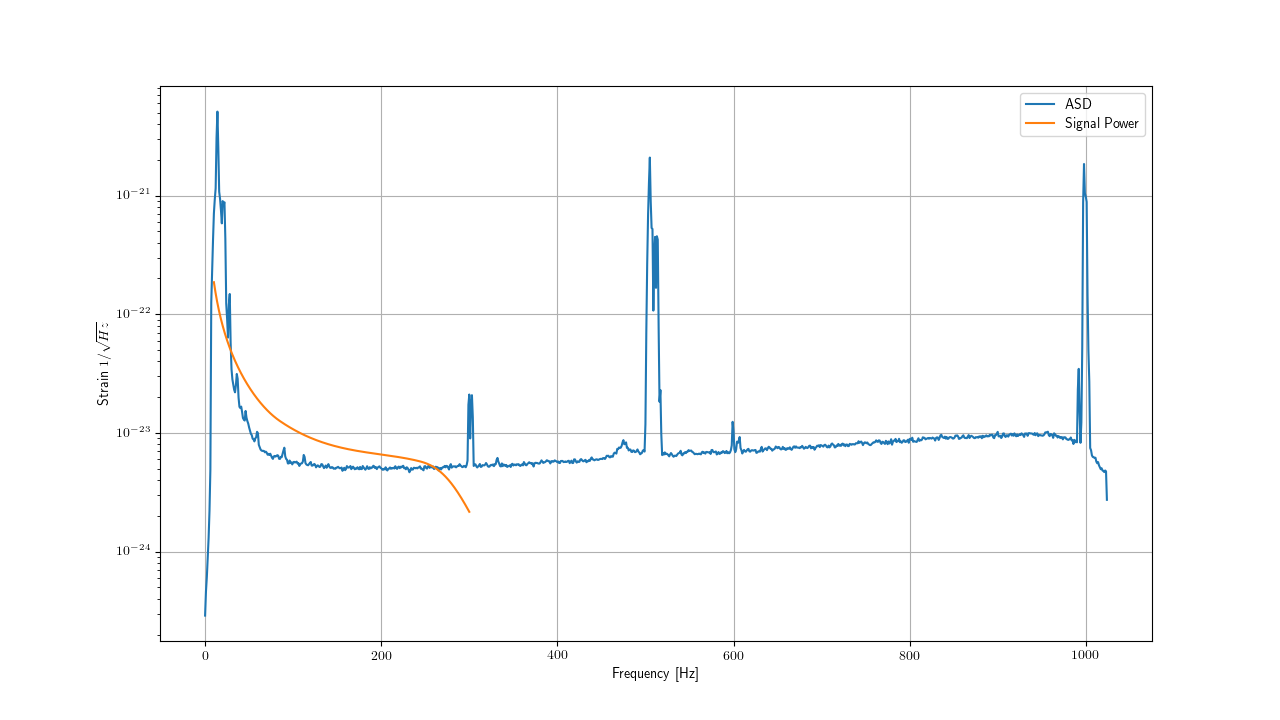

In [4]:
from pycbc.waveform import get_fd_waveform
from pycbc.detector import Detector
from pycbc import DYN_RANGE_FAC
from pycbc.psd import welch
from pycbc.types import load_timeseries

#Calculate PSD
ts = load_timeseries('real_noise.hdf')
psd = welch(ts, 2048, 1024)
asd = psd ** 0.5

#Calculate signal
gps_time = 1126259462
hp, hc = get_fd_waveform(approximant='IMRPhenomXPHM',
                         delta_f=1./64,
                         f_lower=10,
                         mass1=35.3,
                         mass2=29.6,
                         distance=440)
hp.start_time = float(hp.start_time) + gps_time
hc.start_time = float(hc.start_time) + gps_time
det = Detector('H1')
ra, dec = det.optimal_orientation(gps_time)
fp, fc = det.antenna_pattern(ra, dec, 0, gps_time)
wav = fp * hp + fc * hc
wav_asd = (wav * wav.conj()) ** 0.5

#Restrict to certain frequency range
fmin, fmax = 10, 300 
wavsf = wav_asd.sample_frequencies 
wavidxs = np.where(np.logical_and(fmin < wavsf, wavsf < fmax))[0]

#Plot
fig, ax = plt.subplots(figsize=(12.8, 7.2), num='Noise curve')
ax.semilogy(asd.sample_frequencies, asd, label='ASD')
ax.semilogy(wav_asd.sample_frequencies[wavidxs], wav_asd[wavidxs],
            label='Signal Power')
ax.legend()
ax.grid()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Strain $1/\\sqrt{Hz}$')
None

Once this noise curve is known, frequencies at which the detector is particularly noisy can be downweight. This process is called whitening. To whiten the data, it is fourier transformed, divided by the ASD, and transformed back into the time domain. For technical reasons also some data in the beginning and end of each whitened segment is thrown away. If the PSD is used instead of the ASD the process is called over-whitening.

After whitening the data it has a PSD of roughly 1 for all frequencies. Signals will, therefore, be visible in the power spectrum as a deviation from unit power in a given frequency range. See the plot below.

/home/marlin/environments/test3d7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


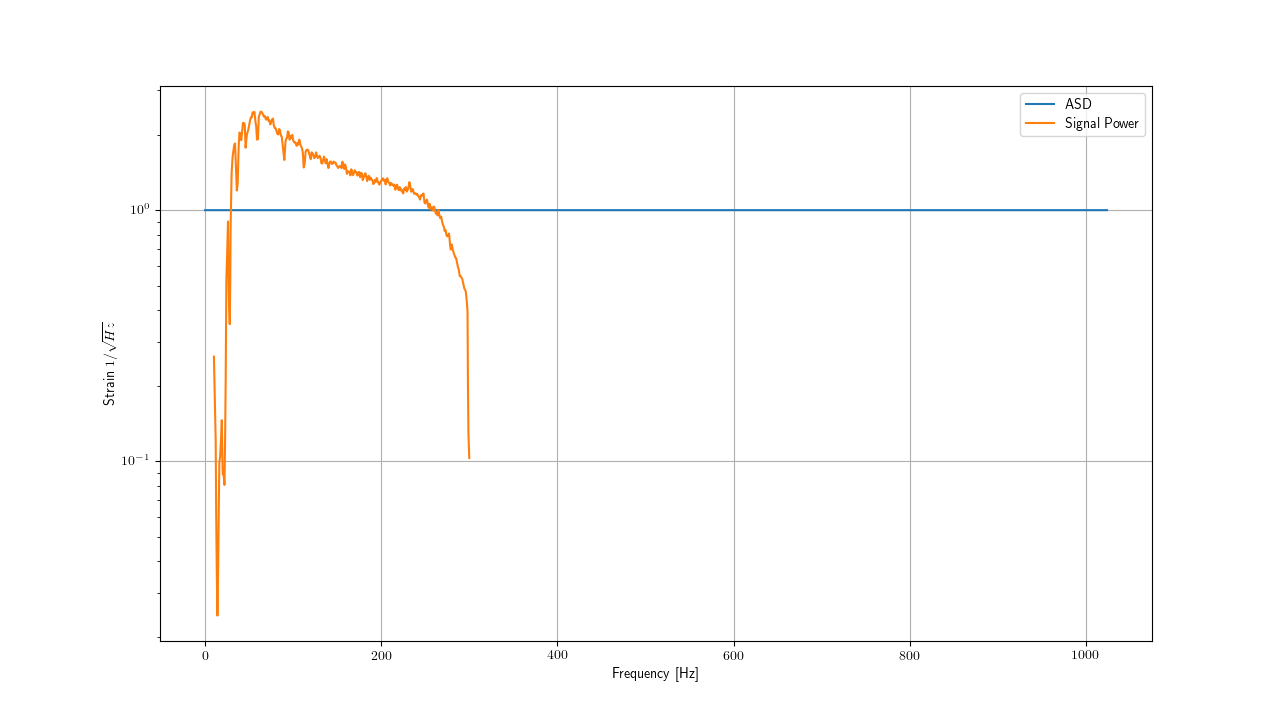

In [5]:
asdf = wav_asd.sample_frequencies[wavidxs]
asdinterp = np.interp(asdf, asd.sample_frequencies, asd.numpy())
fig, ax = plt.subplots(figsize=(12.8, 7.2), num='Noise curve whitened')
ax.semilogy(asd.sample_frequencies, asd / asd, label='ASD')
ax.semilogy(asdf, wav_asd[wavidxs] / asdinterp,
            label='Signal Power')
ax.legend()
ax.grid()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Strain $1/\\sqrt{Hz}$')
None

Additionally, because the detector is especially noisy at very low and very high frequencies, the data is often also bandbassed. A before and after plot for GW150914 can be seen below.

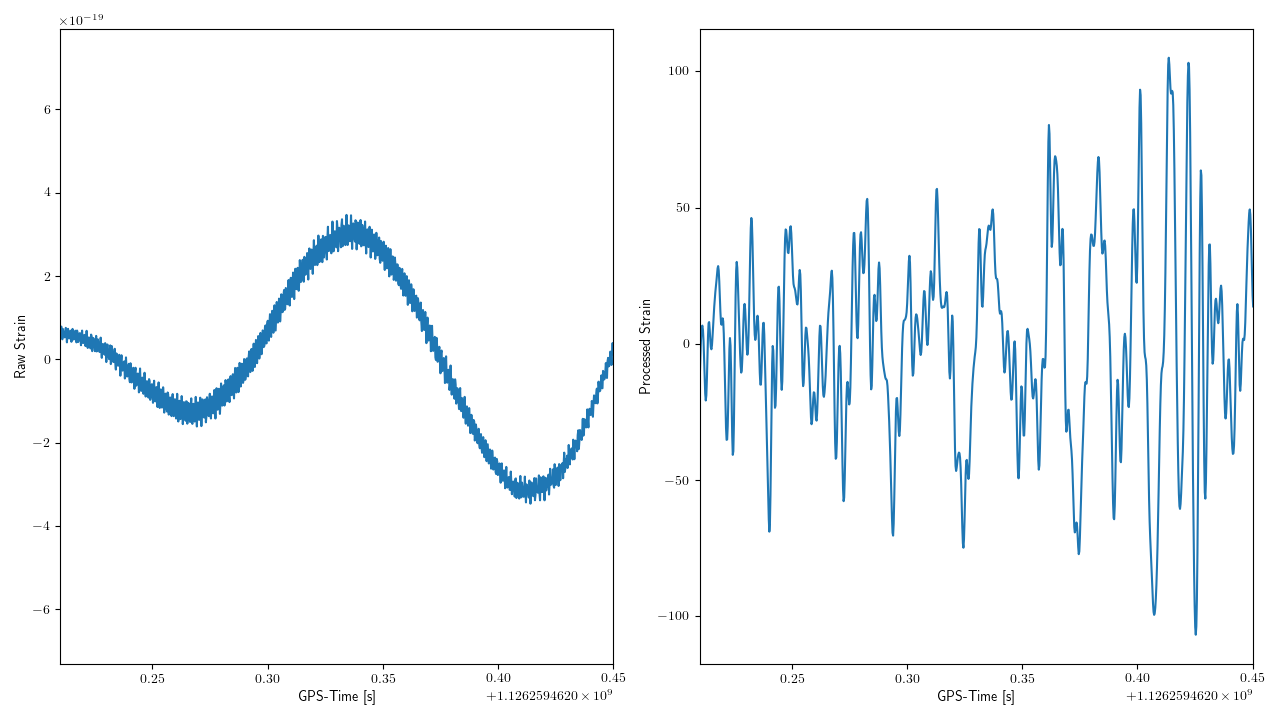

In [6]:
#Code adapted from: https://pycbc.org/pycbc/latest/html/gw150914.html
from pycbc.catalog import Merger
from pycbc.filter import lowpass_fir, highpass_fir

strain = Merger('GW150914').strain('H1')
strain = highpass_fir(strain, 15, 8)
white_strain = strain.whiten(4, 1, low_frequency_cutoff=15)
bandpassed_strain = lowpass_fir(highpass_fir(white_strain, 35, 8), 300, 8)

fig, axs = plt.subplots(ncols=2, figsize=(12.8, 7.2), num='Whitened strain')
axs[0].plot(strain.sample_times, strain)
axs[0].set_xlim(1126259462.21, 1126259462.45)
axs[0].set_xlabel('GPS-Time [s]')
axs[0].set_ylabel('Raw Strain')

axs[1].plot(bandpassed_strain.sample_times, bandpassed_strain)
axs[1].set_xlim(1126259462.21, 1126259462.45)
axs[1].set_xlabel('GPS-Time [s]')
axs[1].set_ylabel('Processed Strain')
fig.tight_layout()

The above discussion assumes that the noise is basically Gaussian and that it is only non-stationary on large time-scales. However, in practice there are short duration noise-transients that contaminate the data. These are known as glitches and some can mimick the behavior of gravitational waves. They come in multiple different shapes and morphologies and only for some of them the cause is known. Some are due to scattered light, others are introduced by the electronics, but some just appear without a known cause. Furthermore, glitches are not rare events. They can occur at rates up to one every few minutes. The best way to visualize them are so called q-scans. A q-scan is a time-frequency analysis of the data. Below we show the q-scan of GW150914 (first plot) and a glitch (second plot).

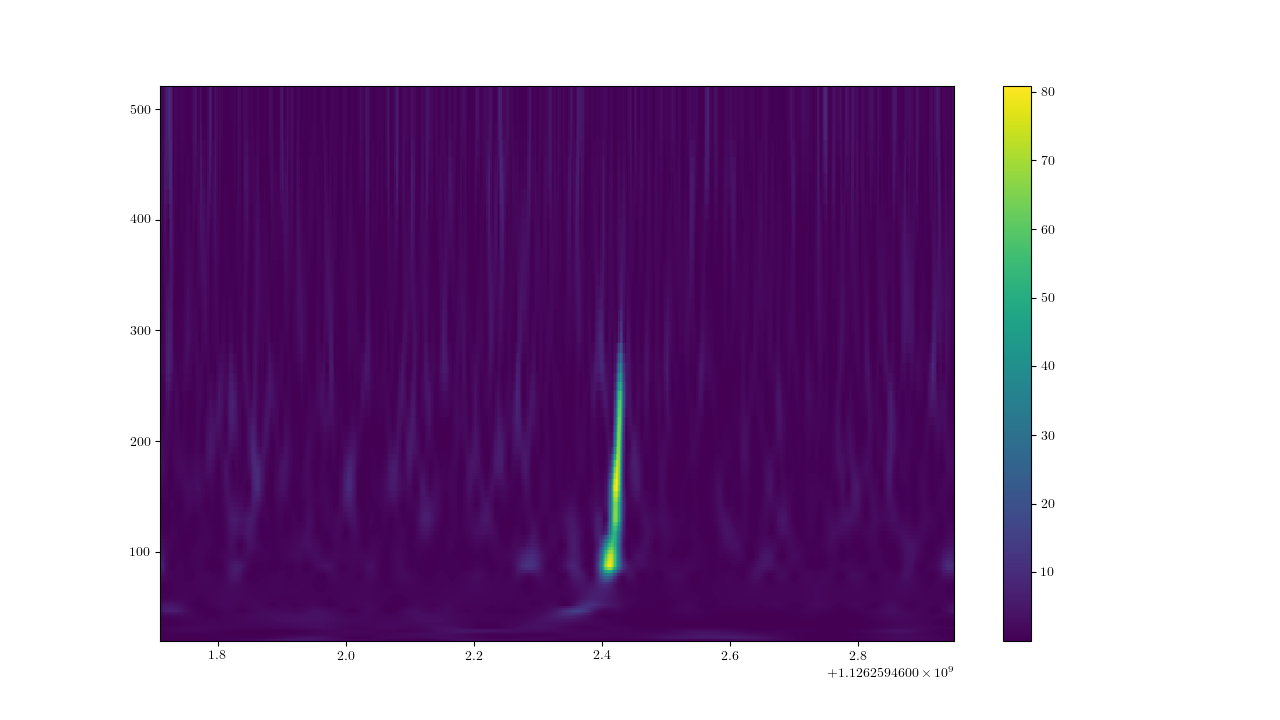

In [7]:
qt, qf, qv = bandpassed_strain.time_slice(1126259461.71, 1126259462.95).qtransform(.002, logfsteps=100, qrange=(10, 10), frange=(20, 512))
fig, ax = plt.subplots(figsize=(12.8, 7.2), num='Q-Transform GW150914')

im = ax.pcolormesh(qt, qf, qv, cmap='viridis', shading='auto')
cbar = fig.colorbar(im)

![Example glitch](glitch.png)

Source: [https://www.zooniverse.org/projects/zooniverse/gravity-spy/about/research](https://www.zooniverse.org/projects/zooniverse/gravity-spy/about/research)

Once detected, these glitches are usually windowed out from the data. In turn some information in the data is lost, which can hurt the recoverability of signals that overlap with a glitch, as was the case for GW170817 [[6]](#GW170817).

With this we conclude this introductory tutorial to gravitational-wave data analysis.

## References
- <a name=gravitational_waves_v1>[1]: [Gravitational Waves Volume 1: Theory and Experiments](https://oxford.universitypressscholarship.com/view/10.1093/acprof:oso/9780198570745.001.0001/acprof-9780198570745), Michele Maggiore, 2007, Oxford University Press</a>
- <a name=schaefer_master>[2]: [Analysis of Gravitational-Wave Signals from Binary Neutron Star Mergers Using Machine Learning](https://doi.org/10.15488/7467), Marlin B. Schäfer, 2019, Master thesis</a>
- <a name=imrphenomxphm>[3]: [Computationally efficient models for the dominant and subdominant harmonic modes of precessing binary black holes](https://doi.org/10.1103/PhysRevD.103.104056), Geraint Pratten et al., 2020, Phys. Rev. D 103, 104056</a>
- <a name=GW190814>[4]: [GW190814: Gravitational Waves from the Coalescence of a 23 Solar Mass Black Hole with a 2.6 Solar Mass Compact Object](https://doi.org/10.3847/2041-8213/ab960f), R. Abbott et al, 2020, ApJL 896 L44</a>
- <a name=aligo>[5]: [Advanced LIGO](https://doi.org/10.1088/0264-9381/32/7/074001), The LIGO Scientific Collaboration et al., 2015, Class. Quantum Grav. 32 074001</a>
- <a name=GW170817>[6]: [GW170817: Observation of Gravitational Waves from a Binary Neutron Star Inspiral](https://doi.org/10.1103/PhysRevLett.119.161101), B. P. Abbott et al. (LIGO Scientific Collaboration and Virgo Collaboration), 2017, Phys. Rev. Lett. 119, 161101</a>